In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import math as m
import pandas as pd
import glob
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy import interpolate

In [2]:
file_path = "//icnas4.cc.ic.ac.uk/rs5115/MSci Project/Laura_simulations/lab_runs"
downwelling = np.loadtxt(file_path + '/Downwelling.txt')
upwelling = np.loadtxt(file_path + '/Upwelling.txt')
transmission = np.loadtxt(file_path + '/Transmission.txt')

In [3]:
def read_file(directory, filename, separator, rowstoskip, head='infer'):
    """
    Reads an external file and outputs it as a Pandas Dataframe
    Input: Directory, Filename (Strings)
    Output: Pandas Dataframe
    """
    path=os.path.join(directory, filename)
    dataset = pd.read_csv(path, header = head, sep=separator, skiprows=rowstoskip)
    
    return dataset


def planck(wavenumber, temperature): # T in Kelvin, wavenumber in cm^-1
    """
    Calculates spectral radiance of a black body at some wavenumber and temperature
    Input: wavenumber (units: cm^{-1}), and temperature T (units: Kelvin) - (Integers or Floats)
    Output: spectral radiance (units: W m^{-2} sr^{-1} cm^{-1}) - (Float)
    """
    h = 6.626e-34
    c = 3.0e+8
    k = 1.381e-23

    planck_a = 2*h*(c**2)
    planck_e = h*c/k
    radiance = 100*planck_a*((wavenumber*100)**3)/(np.exp(planck_e*(wavenumber*100)/temperature)-1)

    return radiance

In [12]:
up_wn = []
up_val = []
for i in np.arange(upwelling.shape[0]):
    up_wn.append(upwelling[i][0])
    up_val.append(upwelling[i][1]*10000)
    
down_wn = []
down_val = []
for i in np.arange(downwelling.shape[0]):
    down_wn.append(downwelling[i][0])
    down_val.append(downwelling[i][1]*10000)

trans_wn = []
trans_val = []
for i in np.arange(transmission.shape[0]):
    if transmission[i][1] > 0.01:
        trans_wn.append(transmission[i][0])
        trans_val.append(transmission[i][1])

In [13]:
f_up = interpolate.interp1d(up_wn, up_val)
f_down = interpolate.interp1d(down_wn, down_val)
f_trans = interpolate.interp1d(trans_wn, trans_val)

In [14]:
up = []
down = []
trans = []
wavenums = np.arange(400,1400,0.1)
for i in wavenums:
    up.append(f_up(i))
    down.append(f_down(i))
    trans.append(f_trans(i))

In [15]:
def emissivity(tau, L_up, L_down, B_atm, B_surf):
    
    N = L_up - (tau**2)*L_down - (1-tau)*B_atm
    D = tau*B_surf - (tau**2)*L_down
    emissivity = N/D
    
    return emissivity

emissivity_vec = np.vectorize(emissivity)
planck_vec = np.vectorize(planck)

In [16]:
em_vals = emissivity_vec(trans, up, down, planck_vec(wavenums, 293.5), planck_vec(wavenums, 293.5))

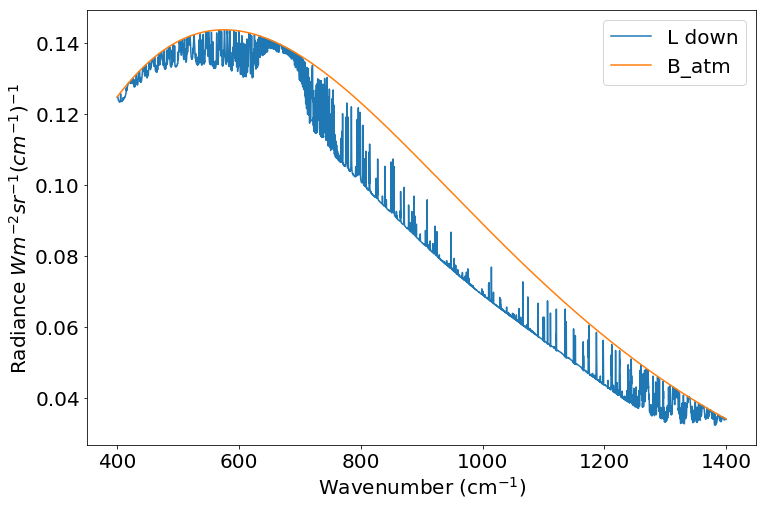

In [28]:
plt.figure(figsize=(12,8))
plt.plot(wavenums, down)
plt.plot(wavenums, planck_vec(wavenums, 293.5))
plt.legend(['L down', 'B_atm'], fontsize=20)
plt.xlabel('Wavenumber (cm$^{-1}$)', fontsize=20)
plt.ylabel('Radiance $W m^{-2} sr^{-1} (cm^{-1})^{-1}$', fontsize=20)
plt.tick_params(labelsize=20)

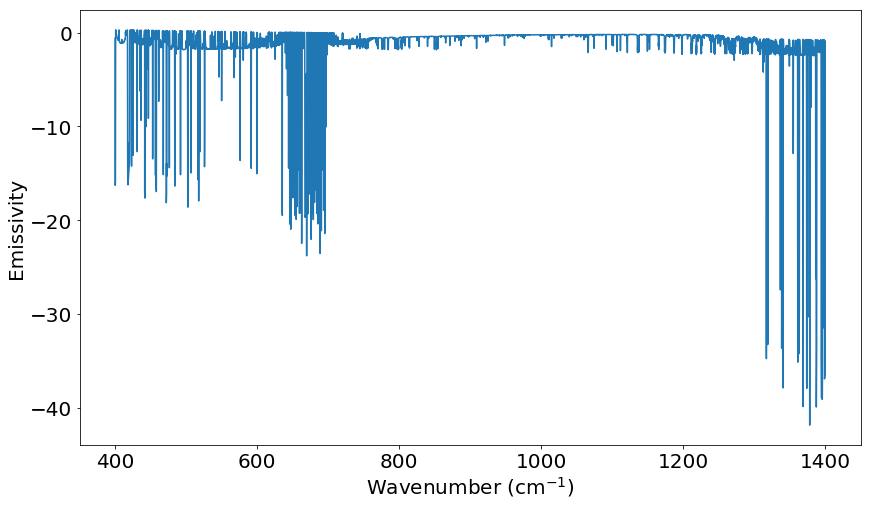

In [29]:
plt.figure(figsize = (14,8))
plt.plot(wavenums, em_vals)
plt.xlabel('Wavenumber (cm$^{-1}$)', fontsize=20)
plt.ylabel('Emissivity', fontsize=20)
plt.tick_params(labelsize=20)